In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = '/content/gdrive/MyDrive/internship/student_data.csv'
data = pd.read_csv(df)

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

First few rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Summary statistics of the dataset:
              age    

Distribution of Numerical features

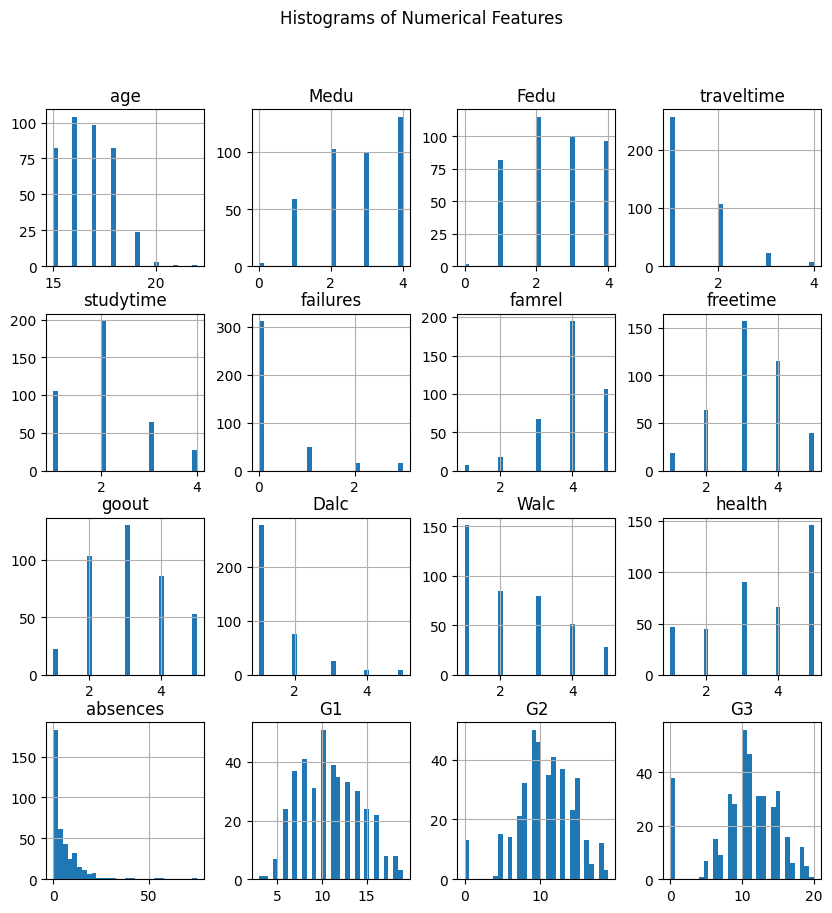

In [ ]:
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features].hist(figsize=(10, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

Distribution of Categorical features

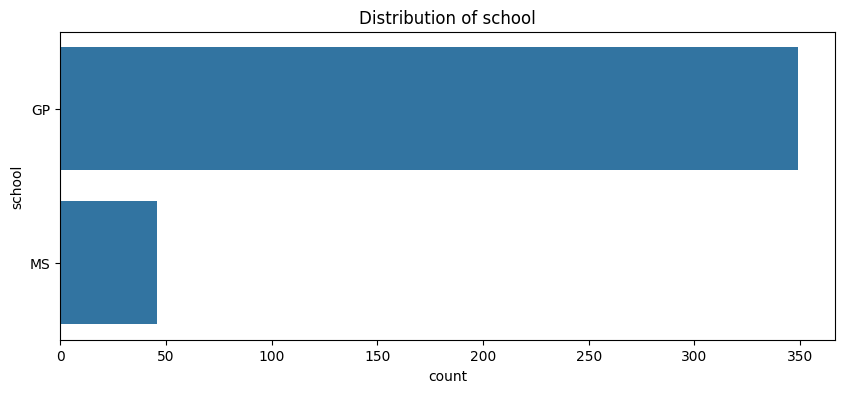

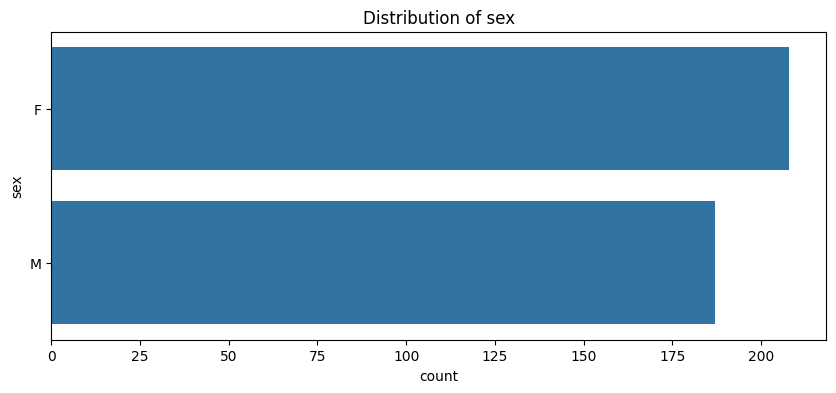

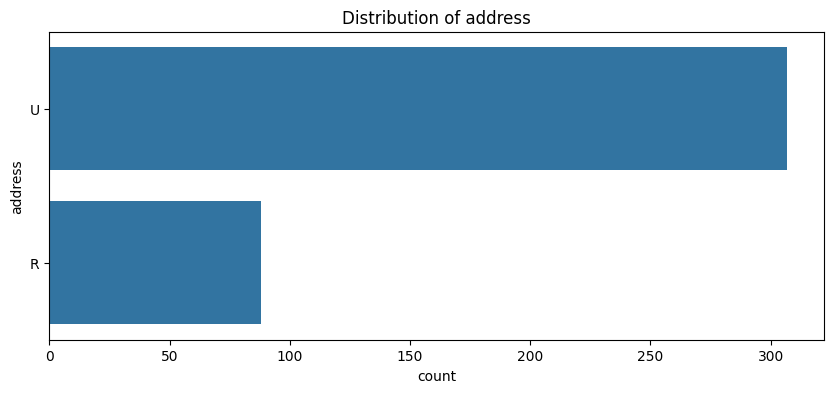

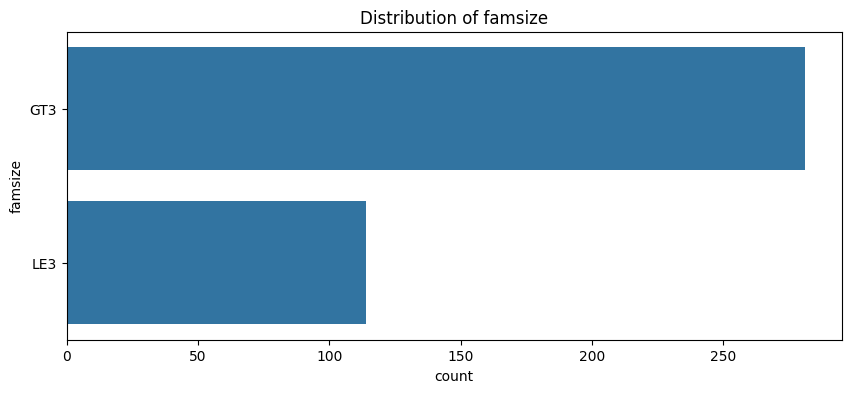

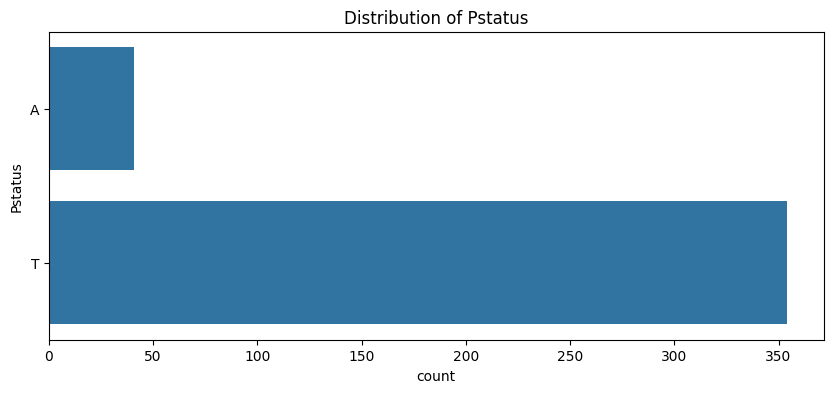

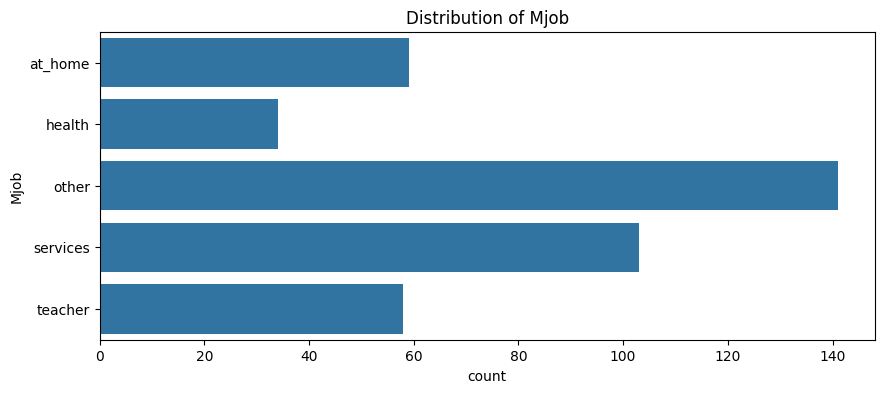

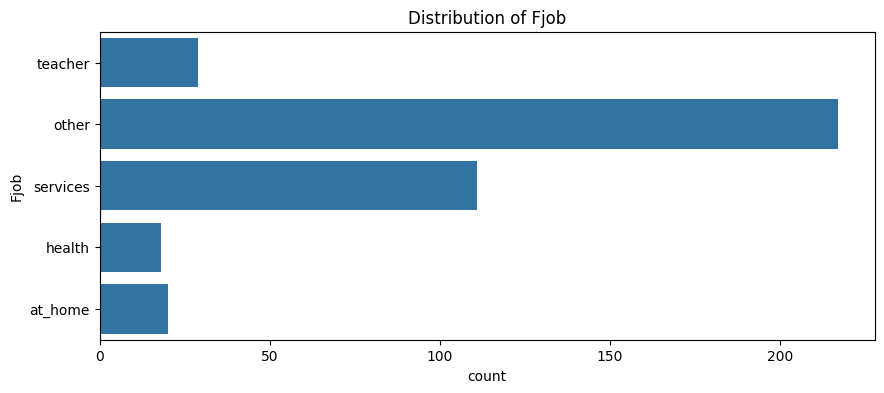

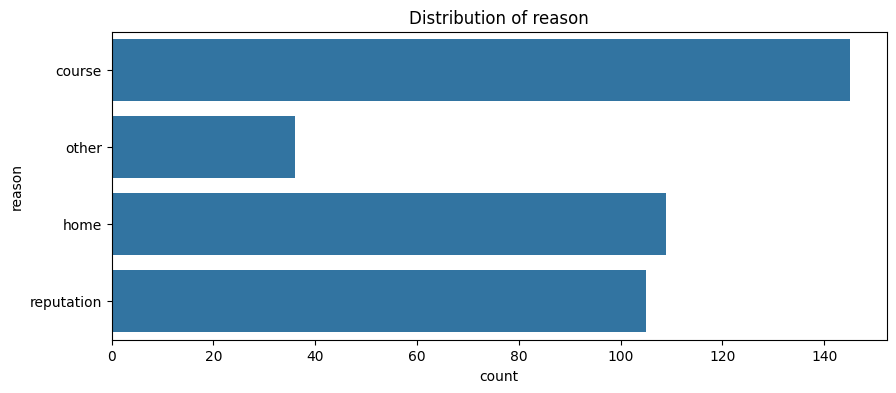

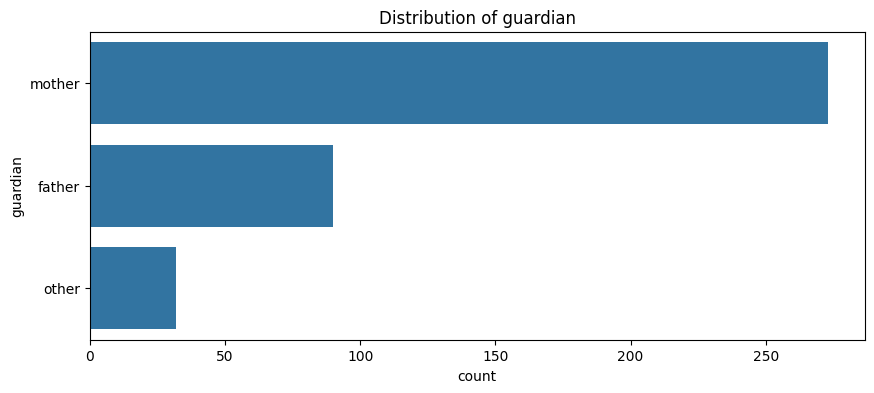

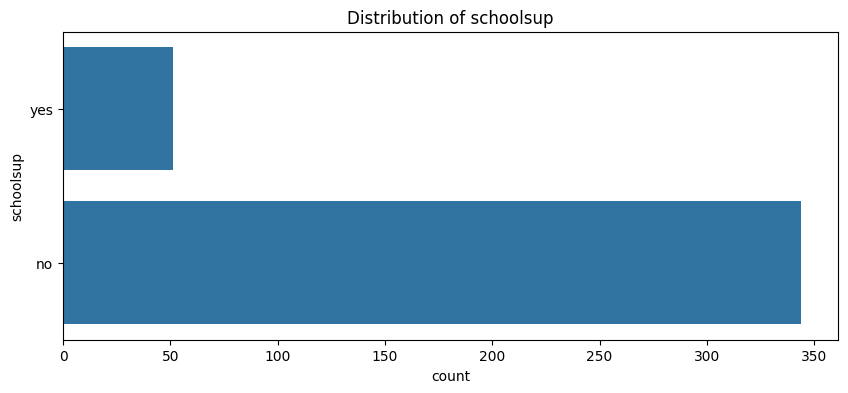

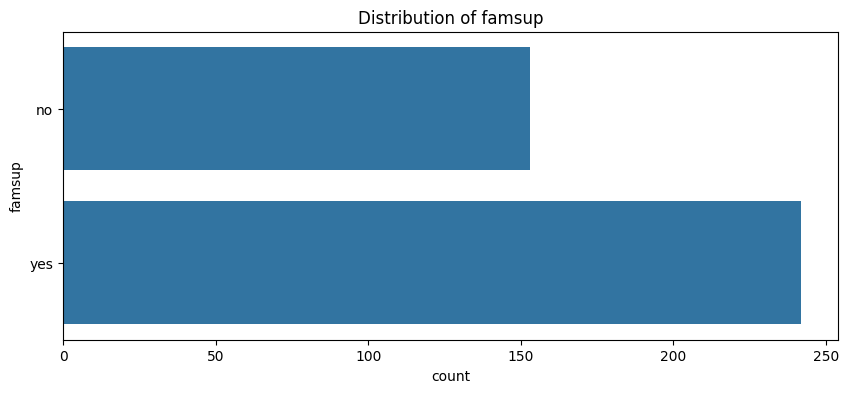

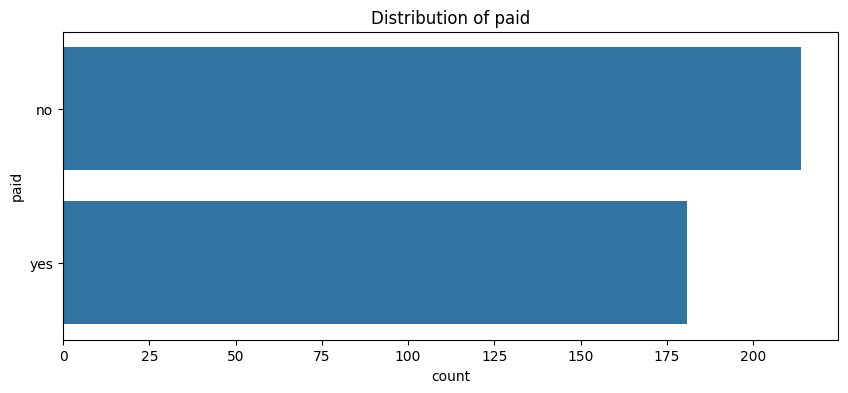

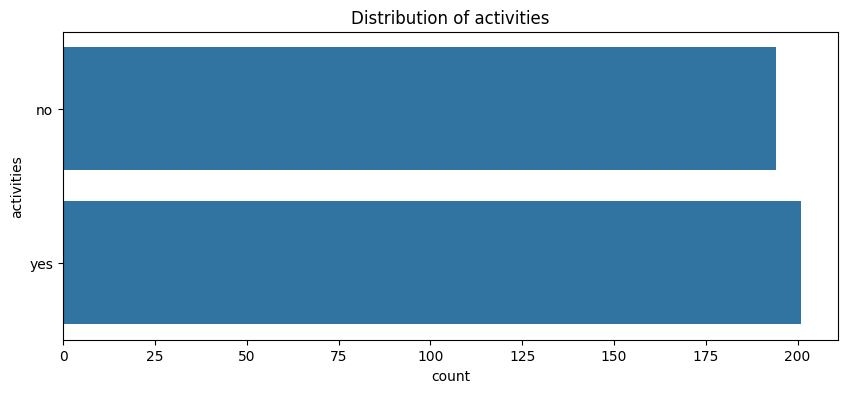

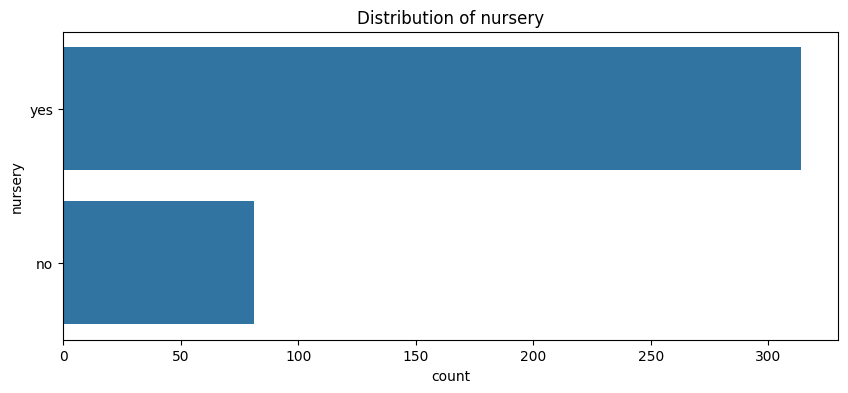

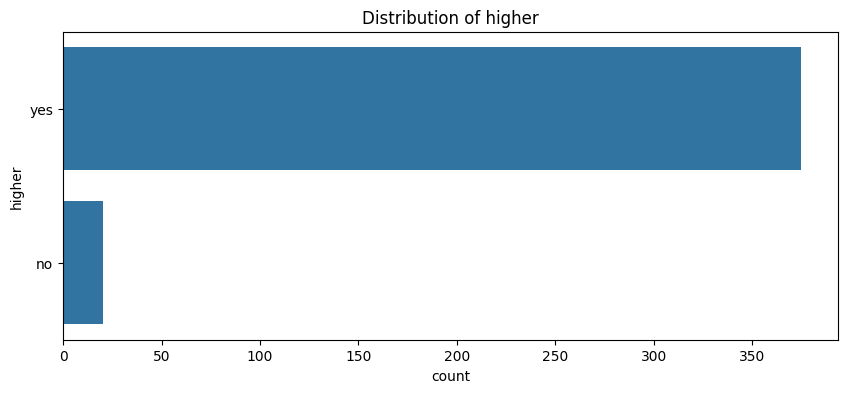

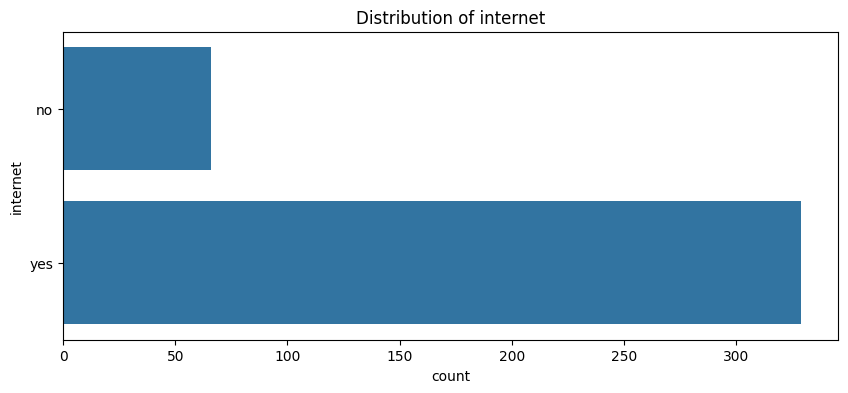

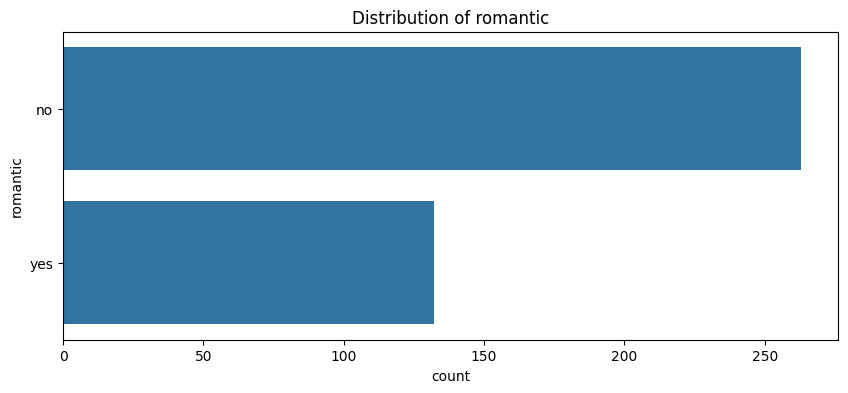

In [ ]:
categorical_features = data.select_dtypes(include=[object]).columns
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

Apply LabelEncoder for the Categorical Features

In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
print(data.keys())

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


# Prediction of Final Grade `G3` - Regression
# Predicting whether a student will move to higher studies or not - Classification

## Classification task

In [ ]:
data.shape

(395, 33)

In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


I am choosing the feature vector as `higher`

In [ ]:
X = data.drop(['higher'], axis=1)

y = data['higher']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((316, 32), (79, 32))

In [ ]:
X_train.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [ ]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,0,1,16,1,0,1,3,3,3,2,...,4,2,3,1,2,3,2,12,13,12
194,0,1,16,1,0,1,2,3,2,2,...,5,3,3,1,1,3,0,13,14,14
173,0,0,16,1,0,1,1,3,0,3,...,4,3,5,1,1,3,0,8,7,0
63,0,0,16,1,0,1,4,3,4,1,...,3,4,4,2,4,4,2,10,9,9
253,0,1,16,0,0,1,2,1,2,2,...,3,3,2,1,3,3,0,8,9,8


In [ ]:
X_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,0,1,17,1,0,1,2,1,2,2,...,4,5,1,1,1,3,2,8,8,10
371,1,1,18,0,1,1,1,2,0,3,...,4,3,3,2,3,3,3,14,12,12
248,0,1,18,0,1,1,3,3,2,3,...,4,3,3,1,3,5,8,3,5,5
55,0,0,16,1,0,0,2,1,2,2,...,5,3,4,1,1,2,8,8,9,10
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9


Applying ``Random Forest Classifier`` Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rc = RandomForestClassifier(n_estimators = 200, random_state = 0)

In [ ]:
rc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
y_pred = rc.predict(X_test)

In [ ]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9747


In [ ]:
feature_scores = pd.Series(rc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

G1            0.077719
absences      0.067568
failures      0.065796
age           0.063984
G2            0.056831
Walc          0.056192
goout         0.051194
G3            0.045709
Medu          0.039436
Mjob          0.037039
Fedu          0.034399
health        0.031094
reason        0.030233
studytime     0.028264
Dalc          0.026225
freetime      0.025398
romantic      0.023772
Fjob          0.023730
sex           0.023091
famrel        0.022684
traveltime    0.022623
activities    0.022460
paid          0.020329
famsup        0.019086
internet      0.017186
guardian      0.016599
nursery       0.013343
school        0.011581
famsize       0.009127
address       0.008803
Pstatus       0.006545
schoolsup     0.001959
dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 0  2]
 [ 0 77]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.99        77

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_rf_classifier = grid_search.best_estimator_

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = np.mean(y_train == y_train_pred)
    test_accuracy = np.mean(y_test == y_test_pred)

    return train_accuracy, test_accuracy

In [ ]:
best_train_accuracy, best_test_accuracy = evaluate_model(best_rf_classifier, X_train, y_train, X_test, y_test)

In [ ]:
cross_val_scores = cross_val_score(rc, X, y, cv=5)

In [ ]:
print(f"Cross-Validation Score: {cross_val_scores.mean():.2f}")
print(f"Best Random Forest Classifier - Train Accuracy: {best_train_accuracy:.2f}, Test Accuracy: {best_test_accuracy:.2f}")

Cross-Validation Score: 0.95
Best Random Forest Classifier - Train Accuracy: 1.00, Test Accuracy: 0.97


In [ ]:
y_class_pred_best = best_rf_classifier.predict(X_test)
print("Classification Report for Best Model:\n", classification_report(y_test, y_class_pred_best))

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.99        77

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Regression task - using ``Ridge Regression & random forest regression``

### Ridge regression
*Prediction of `G3` based on other features*

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
y = data["G3"]
X = data.drop("G3",axis=1)

In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ridge_model = Ridge().fit(X_train,y_train)

In [ ]:
ridge_model.intercept_

-0.8473548418715104

In [ ]:
ridge_model.coef_

array([ 0.09886917,  0.28490224, -0.15819301, -0.04973731, -0.00329339,
       -0.0529018 ,  0.11311088, -0.1604563 ,  0.03003171, -0.14552457,
       -0.03010647,  0.06776056,  0.13919799, -0.01586247, -0.38413386,
        0.72635112,  0.17466521,  0.07325292, -0.57492972, -0.25723901,
        0.13152305, -0.2286221 , -0.40506676,  0.28927381,  0.00641205,
        0.17034981, -0.1715513 ,  0.07884169,  0.05432339,  0.04941607,
        0.20567381,  0.95454991])

In [ ]:
y_pred=ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

2.2397313521694255

In [ ]:
alphas=np.linspace(0.001,1,1000)

In [ ]:
ridge_cv=RidgeCV(alphas,scoring="neg_mean_squared_error",cv=10)
ridge_cv.fit(X_train,y_train)
ridge_cv.alpha_

1.0

In [ ]:
ridge_fine_tuned=Ridge(alpha=0.3933933933933934).fit(X_train,y_train)
y_pred=ridge_fine_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

2.2418710614910213

### Random Forest Regressionn to predict `G3`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
X = data.drop("G3",axis=1)
y = data["G3"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rfregres = RandomForestRegressor(random_state = 0)
rfregres.fit(X, y)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score

Evaluate Model performance

In [ ]:
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return train_rmse, test_rmse, train_mae, test_mae, train_mse, test_mse

In [ ]:
initial_rf_regressor = RandomForestRegressor(random_state=42)
initial_metrics = evaluate_regression_model(initial_rf_regressor, X_train, y_train, X_test, y_test)

Tuning Hyperparameters

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_rf_regressor = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
best_metrics = evaluate_regression_model(best_rf_regressor, X_train, y_train, X_test, y_test)

In [ ]:
print(f"Initial Random Forest Regressor Metrics - Train RMSE: {initial_metrics[0]:.2f}, Test RMSE: {initial_metrics[1]:.2f}")
print(f"Train MAE: {initial_metrics[2]:.2f}, Test MAE: {initial_metrics[3]:.2f}")
print(f"Train MSE: {initial_metrics[4]:.2f}, Test MSE: {initial_metrics[5]:.2f}")

print(f"Best Random Forest Regressor Metrics - Train RMSE: {best_metrics[0]:.2f}, Test RMSE: {best_metrics[1]:.2f}")
print(f"Train MAE: {best_metrics[2]:.2f}, Test MAE: {best_metrics[3]:.2f}")
print(f"Train MSE: {best_metrics[4]:.2f}, Test MSE: {best_metrics[5]:.2f}")

Initial Random Forest Regressor Metrics - Train RMSE: 0.60, Test RMSE: 1.87
Train MAE: 0.36, Test MAE: 1.11
Train MSE: 0.36, Test MSE: 3.49
Best Random Forest Regressor Metrics - Train RMSE: 0.60, Test RMSE: 1.87
Train MAE: 0.36, Test MAE: 1.11
Train MSE: 0.36, Test MSE: 3.49


## K Mean Clustering

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
! pip install gapstatistics

In [ ]:
corrM = data.corr()

corrM

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


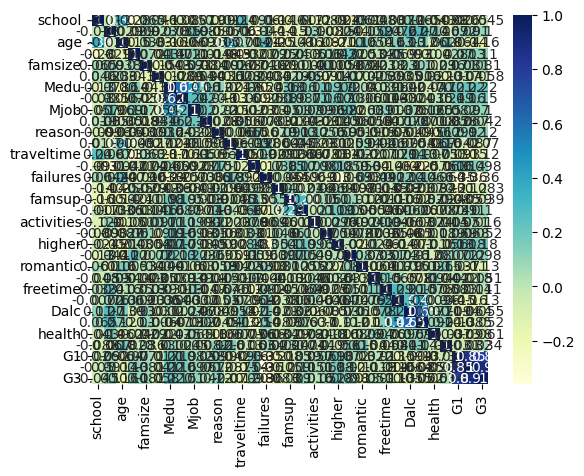

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

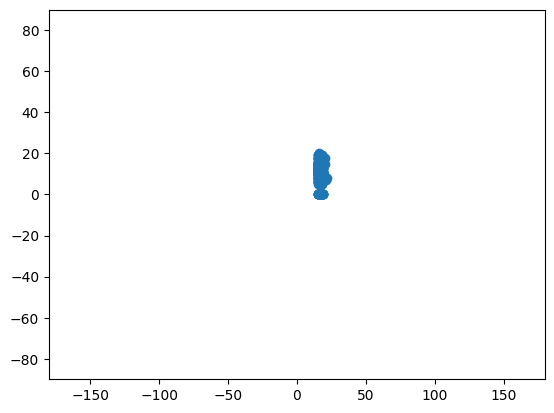

In [ ]:
plt.scatter(data['age'],data['G3'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Applyng K means clustering

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.27


In [ ]:
data['Cluster'] = cluster_labels

PLotting the clusters, we obtain

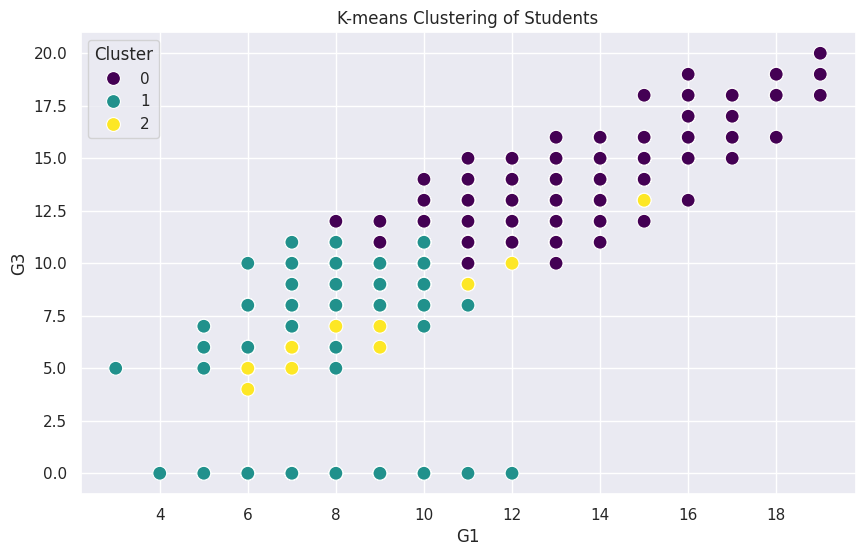

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['G1'], y=data['G3'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('K-means Clustering of Students')
plt.xlabel('G1')
plt.ylabel('G3')
plt.legend(title='Cluster')
plt.show()